In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nn_robust_attacks.setup_mnist import MNIST, MNISTModel

Using TensorFlow backend.


In [101]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

data = MNIST()

# CNN Model for MNIST 
class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)

In [102]:
# Training variables
num_epochs = 10
batch_size = 128
train_temp = 1

training = False

In [2]:
inputs = np.array([1, 2])

In [3]:
np.save('four_subset_data/TEST.csv', inputs)

# Model Training

In [103]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted/train_temp)

# Train first model 
modelname = "models/trained_model1"
model1 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model1.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model1.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model1.model.save(modelname)
else:
    model1.model = load_model(modelname, custom_objects={'fn':fn})
        
model1.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 64)       

In [104]:
# Train second model 
modelname = "models/trained_model2"
model2 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model2.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model2.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model2.model.save(modelname)
else:
    model2.model = load_model(modelname, custom_objects={'fn':fn})
    
model2.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [105]:
# Train third model 
modelname = "models/trained_model3"
model3 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model3.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model3.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model3.model.save(modelname)   
else:
    model3.model = load_model(modelname, custom_objects={'fn':fn})
    
model3.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 10, 10, 64)       

In [106]:
# Train fourth model 
modelname = "models/trained_model4"
model4 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model4.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model4.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model4.model.save(modelname)
else:
    model4.model = load_model(modelname, custom_objects={'fn':fn})
    
model4.model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_45 (Activation)   (None, 10, 10, 64)       

In [107]:
# Train fifth model 
modelname = "models/trained_model5"
model5 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model5.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model5.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model5.model.save(modelname)
else:
    model5.model = load_model(modelname, custom_objects={'fn':fn})
    
model5.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_27 (Activation)   (None, 10, 10, 64)       

In [108]:
# Train sixth model 
modelname = "models/trained_model6"
model6 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model6.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model6.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model6.model.save(modelname)
else:
    model6.model = load_model(modelname, custom_objects={'fn':fn})
    
model6.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_38 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 10, 10, 64)       

In [109]:
# Train seventh model 
modelname = "models/trained_model7"
model7 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model7.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model7.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model7.model.save(modelname)
else:
    model7.model = load_model(modelname, custom_objects={'fn':fn})
    
model7.model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_133 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_134 (Activation)  (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_135 (Activation)  (None, 10, 10, 64)      

In [110]:
# Train eighth model 
modelname = "models/trained_model8"
model8 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model8.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model8.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model8.model.save(modelname)
else:
    model8.model = load_model(modelname, custom_objects={'fn':fn})
    
model8.model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_55 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_56 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_57 (Activation)   (None, 10, 10, 64)      

In [111]:
# Train ninth model 
modelname = "models/trained_model9"
model9 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model9.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model9.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model9.model.save(modelname)
else:
    model9.model = load_model(modelname, custom_objects={'fn':fn})
    
model9.model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_61 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_62 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_63 (Activation)   (None, 10, 10, 64)      

In [112]:
# Train tenth model 
modelname = "models/trained_model10"
model10 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model10.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model10.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model10.model.save(modelname)
else:
    model10.model = load_model(modelname, custom_objects={'fn':fn})
    
model10.model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_103 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_104 (Activation)  (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_105 (Activation)  (None, 10, 10, 64)      

In [113]:
# Train eleventh model 
modelname = "models/trained_model11"
model11 = MNIST_Model()
if training:            
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model11.model.compile(loss=fn,
                  optimizer=sgd,
                  metrics=['accuracy'])
    model11.model.fit(data.train_data, data.train_labels,
              batch_size=batch_size,
              validation_data=(data.validation_data, data.validation_labels),
              nb_epoch=num_epochs,
              shuffle=True)
    model11.model.save(modelname)
else:
    model11.model = load_model(modelname, custom_objects={'fn':fn})
    
model11.model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_79 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_80 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_81 (Activation)   (None, 10, 10, 64)      

# Preprocess / Setup

In [114]:
from keras.datasets import mnist as data_keras
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = data_keras.load_data()
x_train = x_train[...,np.newaxis] /255.0
x_test = x_test[...,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [115]:
# Model performances
scores = model1.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model2.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model3.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model4.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model5.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model6.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model7.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model8.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model9.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model10.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

scores = model11.model.evaluate(x_test, y_test)
print("loss={}, accuracy={}".format(*scores))

10000/10000 [==============================] - 3s 255us/step
loss=0.060424025029380574, accuracy=0.9833999872207642
10000/10000 [==============================] - 3s 257us/step
loss=0.060767219057303735, accuracy=0.9829999804496765
10000/10000 [==============================] - 3s 254us/step
loss=0.1604284207782708, accuracy=0.9513999819755554
10000/10000 [==============================] - 3s 253us/step
loss=0.06374289788251045, accuracy=0.979200005531311
10000/10000 [==============================] - 2s 249us/step
loss=0.1024473569555208, accuracy=0.9670000076293945
10000/10000 [==============================] - 2s 249us/step
loss=0.12785435293135233, accuracy=0.9595999717712402
10000/10000 [==============================] - 3s 253us/step
loss=0.09540959330903133, accuracy=0.9692999720573425
10000/10000 [==============================] - 3s 250us/step
loss=0.11338679843976861, accuracy=0.9685999751091003
10000/10000 [==============================] - 3s 250us/step
loss=0.0712376540601

In [116]:
test_size = 250
num_img = test_size // 10
trial_data = []
indicies = []

for i in range(0, 10):
    trial_data.append([])
    indicies.append([])
    for idx, img in enumerate(data.test_data):
        if np.nonzero(data.test_labels[idx])[0][0] == i:
            trial_data[i].append(data.test_data[idx])
            indicies[i].append(idx)
        if len(trial_data[i]) >= num_img:
            break

In [117]:
import random
target_data = []

for i in range(0, 10):
    target_data.append([])
    for j in range(0, int(num_img)):
        numbers = list(range(0, i)) + list(range(i + 1, 10))
        r = random.choice(numbers)
        target_data[i].append(r)

target_labels = []
for i in range(0, 10):
    target_labels.append(to_categorical(target_data[i]))

In [118]:
plt.set_cmap('Greys_r')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [121]:
true_label = 0
#inputs = np.asarray(trial_data[true_label])
#targets = target_labels[true_label]

targets = np.array([to_categorical(9)])
for i in range(0, num_img - 1):
    targets = np.vstack([targets, np.array(to_categorical(9))])

In [122]:
#targets = np.load('targets_0.csv.npy')
inputs = np.load('inputs_0.csv.npy')

# Helper Functions

In [123]:
def plot_adversarial(inputs, adv):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(inputs[0][:,:,0])
    ax2.imshow(adv[0][:,:,0])
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])

In [124]:
from numpy import savetxt

def save_results(true_label, inputs, adv, targets, num, misc):
    np.save('inputs_' + num + '_' + misc +'_' + str(true_label) + '.csv', inputs)
    np.save('adv_' + num + '_' + misc + '_' + str(true_label) + '.csv', adv)
    np.save('targets_' + num + '_' + misc + '_' + str(true_label) + '.csv', targets)  

In [125]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return image_class[0], max(max(pr))

In [126]:
def attack_evaluation(num_img, adv, num_models):
    for i in range(0, num_img):
        print(i)
        print('Model 1', get_label_confidence(adv[i][np.newaxis, ...], model1.model))
        if num_models > 1: 
            print('Model 2', get_label_confidence(adv[i][np.newaxis, ...], model2.model))
            if num_models > 2:
                print('Model 3', get_label_confidence(adv[i][np.newaxis, ...], model3.model))
                print('Model 4', get_label_confidence(adv[i][np.newaxis, ...], model4.model))
                if num_models > 4:
                    print('Model 5', get_label_confidence(adv[i][np.newaxis, ...], model5.model))
                    print('Model 6', get_label_confidence(adv[i][np.newaxis, ...], model6.model))
                    if num_models > 6:
                        print('Model 7', get_label_confidence(adv[i][np.newaxis, ...], model7.model))
                        print('Model 8', get_label_confidence(adv[i][np.newaxis, ...], model8.model))
                        if num_models > 8:
                            print('Model 9', get_label_confidence(adv[i][np.newaxis, ...], model9.model))
                            print('Model 10', get_label_confidence(adv[i][np.newaxis, ...], model10.model))

In [127]:
def size_of_attack(adv, inputs, num_img):
    perturb = adv - inputs
    perturb_mean =  np.sum(perturb) / num_img 
    perturb_std = np.std(np.array([sum(x) for x in perturb]))
    print('Mean', perturb_mean)
    print('Standard Deviation', perturb_std)

In [134]:
def transferability(num_img, adv, n):
    for i in range(0, num_img):
        print(i)
        if n == 2:
            print('Model 3', get_label_confidence(adv[i][np.newaxis, ...], model3.model))
        if n == 4:
            print('Model 5', get_label_confidence(adv[i][np.newaxis, ...], model5.model))
        if n == 6:
            print('Model 7', get_label_confidence(adv[i][np.newaxis, ...], model7.model))
        if n == 8:
            print('Model 9', get_label_confidence(adv[i][np.newaxis, ...], model9.model))
        if n == 10:
            print('Model 11', get_label_confidence(adv[i][np.newaxis, ...], model11.model))

# Two Model Attack / Defend

In [129]:
from nn_robust_attacks.l2_attack_dual import CarliniL2

# Attack four models and protect one
adv = CarliniL2(sess, model1, model2).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.021143615, 0.017088797, 0.0)
1000 (0.017262759, 0.017253831, 0.0)
2000 (0.01726816, 0.017253168, 0.0)
[10000000000.0]
0 (0.17502329, 0.17087747, 0.0)
1000 (0.17173593, 0.17073584, 0.0)
2000 (0.17174125, 0.17072748, 0.0)
[10000000000.0]
0 (1.7129292, 1.7087641, 0.0)
1000 (1.6279509, 1.5288308, 0.0)
2000 (1.6279336, 1.5287287, 0.0)
[10000000000.0]
0 (17.091793, 17.087626, 0.0)
1000 (7.7528234, 0.8351494, 0.0)
2000 (7.755621, 0.8455931, 0.029908428)
3000 (7.786645, 0.754212, 0.08010114)
[10000000000.0]
0 (170.88039, 170.87622, 0.0)
1000 (7.990629, 0.0, 0.0)
2000 (8.269975, 0.0, 0.0)
[7.7785873]
0 (93.986084, 93.98192, 0.0)
1000 (7.9434977, 0.0, 0.0)
2000 (7.9009027, 0.0, 0.0)
3000 (7.820803, 0.0, 0.0)
4000 (7.6100273, 0.0, 0.0)
5000 (7.568058, 0.0, 0.0)
6000 (7.627735, 0.0, 0.0)
[7.4976745]
0 (55.538944, 55.534775, 0.0)
1000 (7.678084, 0.049272135, 0.0)
2000 (7.650261, 0.0, 0.0)
3000 (7.6148243, 0.0, 0.0)
[7.4976745]
0 (36.315372, 36.311203, 0.0)
10

In [130]:
save_results(true_label, inputs, adv, targets, 'dual', 'att_def')

In [131]:
attack_evaluation(num_img, adv, 2)

0
Model 1 (9, 0.41697437)
Model 2 (0, 0.8859522)
1
Model 1 (9, 0.37117007)
Model 2 (0, 0.7598012)
2
Model 1 (9, 0.39753273)
Model 2 (0, 0.99580526)
3
Model 1 (9, 0.28630885)
Model 2 (0, 0.992216)
4
Model 1 (9, 0.35213572)
Model 2 (0, 0.999855)
5
Model 1 (9, 0.51028466)
Model 2 (0, 0.9975352)
6
Model 1 (9, 0.42972606)
Model 2 (0, 0.9999943)
7
Model 1 (9, 0.5107104)
Model 2 (0, 0.9999995)
8
Model 1 (9, 0.3610235)
Model 2 (0, 0.99957377)
9
Model 1 (9, 0.36992228)
Model 2 (0, 0.9985994)
10
Model 1 (9, 0.48795038)
Model 2 (0, 0.99815375)
11
Model 1 (9, 0.4983644)
Model 2 (0, 0.9999544)
12
Model 1 (9, 0.50461334)
Model 2 (0, 0.9988446)
13
Model 1 (9, 0.36999083)
Model 2 (0, 0.9999722)
14
Model 1 (9, 0.35651866)
Model 2 (0, 0.99797344)
15
Model 1 (9, 0.50149053)
Model 2 (0, 0.99625427)
16
Model 1 (9, 0.45155028)
Model 2 (0, 0.953597)
17
Model 1 (9, 0.36468866)
Model 2 (0, 0.9868635)
18
Model 1 (9, 0.5234156)
Model 2 (0, 0.9999989)
19
Model 1 (9, 0.35999927)
Model 2 (0, 0.99997634)
20
Model 1 

In [132]:
size_of_attack(adv, inputs, num_img)

Mean 3.46072265625
Standard Deviation 0.8677331


In [135]:
transferability(num_img, adv, 2)

0
Model 3 (0, 0.9656746)
1
Model 3 (0, 0.5289192)
2
Model 3 (0, 0.96413106)
3
Model 3 (0, 0.97704864)
4
Model 3 (0, 0.9982996)
5
Model 3 (0, 0.9748142)
6
Model 3 (0, 0.87179244)
7
Model 3 (0, 0.9948644)
8
Model 3 (0, 0.83378744)
9
Model 3 (0, 0.99948925)
10
Model 3 (0, 0.97800684)
11
Model 3 (0, 0.9111637)
12
Model 3 (0, 0.78989154)
13
Model 3 (0, 0.98673075)
14
Model 3 (0, 0.7931099)
15
Model 3 (0, 0.8224324)
16
Model 3 (0, 0.9520309)
17
Model 3 (0, 0.95132613)
18
Model 3 (0, 0.999848)
19
Model 3 (0, 0.86922395)
20
Model 3 (0, 0.9984533)
21
Model 3 (0, 0.83867407)
22
Model 3 (0, 0.99979544)
23
Model 3 (0, 0.89353096)
24
Model 3 (0, 0.9959545)


# Four Model Attack

In [136]:
from nn_robust_attacks.l2_attack_quad import CarliniL2

# Attack four models and protect one
adv = CarliniL2(sess, model1, model2, model3, model4, attack=True).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.061848927, 0.01711047, 0.019982731)
1000 (0.058187332, 0.017219804, 0.020107744)
2000 (0.058188893, 0.017219314, 0.020107301)
[10000000000.0]
0 (0.5813816, 0.17110266, 0.19982167)
1000 (0.5734181, 0.16725437, 0.19483009)
2000 (0.57341135, 0.16727673, 0.19486919)
[10000000000.0]
0 (5.7762647, 1.7110251, 1.99821)
1000 (4.8095703, 1.1281854, 1.2581623)
2000 (4.809574, 1.1290085, 1.2594243)
[10000000000.0]
0 (57.725033, 17.110247, 19.982096)
1000 (10.295275, 0.11004839, 0.065488435)
2000 (10.257769, 0.01121483, 0.0)
3000 (10.236549, 0.019541599, 0.03575716)
[8.186421]
0 (31.75065, 9.410635, 10.990153)
1000 (9.033456, 0.6944167, 0.006446415)
2000 (9.012741, 0.6091175, 0.0)
3000 (8.999678, 0.63549566, 0.0004972991)
4000 (9.003398, 0.60521734, 0.013778692)
[8.186421]
0 (44.737843, 13.260439, 15.486124)
1000 (9.786904, 0.04297139, 0.0)
2000 (9.788015, 0.06809276, 0.0)
3000 (9.795457, 0.0, 0.03545976)
[7.79772]
0 (38.24425, 11.335539, 13.23814)
1000 (9.43

In [137]:
save_results(true_label, inputs, adv, targets, 'quad', 'att')

In [138]:
attack_evaluation(num_img, adv, 4)

0
Model 1 (9, 0.33448192)
Model 2 (9, 0.3721544)
Model 3 (9, 0.54683536)
Model 4 (0, 0.77575535)
1
Model 1 (9, 0.27073446)
Model 2 (9, 0.3507165)
Model 3 (9, 0.82885206)
Model 4 (5, 0.629268)
2
Model 1 (9, 0.42544335)
Model 2 (9, 0.5311113)
Model 3 (9, 0.957656)
Model 4 (0, 0.632499)
3
Model 1 (9, 0.3607225)
Model 2 (0, 0.8586686)
Model 3 (0, 0.47876626)
Model 4 (0, 0.8515599)
4
Model 1 (9, 0.2574064)
Model 2 (9, 0.24044742)
Model 3 (9, 0.48869333)
Model 4 (3, 0.95738006)
5
Model 1 (9, 0.3604756)
Model 2 (9, 0.34084016)
Model 3 (9, 0.49835283)
Model 4 (5, 0.9764179)
6
Model 1 (9, 0.35379001)
Model 2 (0, 0.97714394)
Model 3 (9, 0.46764836)
Model 4 (0, 0.8663711)
7
Model 1 (9, 0.3708386)
Model 2 (0, 0.371707)
Model 3 (9, 0.7602247)
Model 4 (0, 0.623751)
8
Model 1 (9, 0.36220327)
Model 2 (9, 0.47217238)
Model 3 (9, 0.364511)
Model 4 (0, 0.9937959)
9
Model 1 (9, 0.52440494)
Model 2 (9, 0.59665114)
Model 3 (9, 0.9170583)
Model 4 (9, 0.54551655)
10
Model 1 (9, 0.32133004)
Model 2 (9, 0.37219

In [139]:
size_of_attack(adv, inputs, num_img)

Mean 2.7847314453125
Standard Deviation 0.93993163


In [140]:
transferability(num_img, adv, 4)

0
Model 5 (9, 0.50722235)
1
Model 5 (2, 0.491167)
2
Model 5 (9, 0.8221114)
3
Model 5 (0, 0.9287508)
4
Model 5 (3, 0.6012239)
5
Model 5 (0, 0.97285813)
6
Model 5 (5, 0.6656291)
7
Model 5 (0, 0.6999745)
8
Model 5 (0, 0.48775417)
9
Model 5 (9, 0.9496545)
10
Model 5 (7, 0.63605285)
11
Model 5 (9, 0.42805684)
12
Model 5 (9, 0.6279774)
13
Model 5 (9, 0.98329055)
14
Model 5 (5, 0.5794912)
15
Model 5 (0, 0.9768118)
16
Model 5 (9, 0.6623937)
17
Model 5 (9, 0.45013463)
18
Model 5 (0, 0.91623175)
19
Model 5 (9, 0.67001814)
20
Model 5 (9, 0.5049047)
21
Model 5 (0, 0.9112334)
22
Model 5 (0, 0.7002172)
23
Model 5 (5, 0.50113446)
24
Model 5 (0, 0.95633274)


# Four Model Defense

In [141]:
from nn_robust_attacks.l2_attack_quad import CarliniL2

# Attack four models and protect one
adv = CarliniL2(sess, model1, model2, model3, model4, attack=False).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.025487604, 0.017219558, 0.0)
1000 (0.021540524, 0.017264295, 0.0)
2000 (0.021544883, 0.017264683, 0.0)
[10000000000.0]
0 (0.21790765, 0.17218709, 0.0)
1000 (0.21423075, 0.171966, 0.0)
2000 (0.21423116, 0.1719584, 0.0)
[10000000000.0]
0 (2.1415386, 1.7218558, 0.0)
1000 (2.0301611, 1.6394392, 0.0)
2000 (2.0301695, 1.6384163, 0.0)
[10000000000.0]
0 (21.377789, 17.21854, 0.0)
1000 (9.204575, 1.461527, 0.0)
2000 (9.148261, 1.4662925, 0.0)
3000 (9.183585, 1.453499, 0.0)
[10000000000.0]
0 (213.74023, 172.18538, 0.0)
1000 (10.276417, 0.0, 0.0)
2000 (9.517803, 0.0, 0.0)
3000 (9.26679, 0.0, 0.0)
4000 (9.377335, 0.0, 0.0)
[9.184179]
0 (117.55902, 94.70196, 0.0)
1000 (9.423952, 0.0, 0.0)
2000 (9.225073, 0.0, 0.0)
3000 (9.295018, 0.0, 0.0)
[9.124489]
0 (69.468414, 55.960255, 0.0)
1000 (9.685382, 0.26523116, 0.0)
2000 (9.123353, 0.026737647, 0.0)
3000 (9.128726, 0.0, 0.0)
4000 (9.040197, 0.0, 0.0)
5000 (9.234224, 0.0, 0.0)
[9.0083065]
0 (45.42309, 36.589394, 0

In [142]:
save_results(true_label, inputs, adv, targets, 'quad', 'def')

In [143]:
attack_evaluation(num_img, adv, 4)

0
Model 1 (9, 0.2543537)
Model 2 (0, 0.7532566)
Model 3 (0, 0.9996201)
Model 4 (0, 0.954344)
1
Model 1 (9, 0.2745883)
Model 2 (0, 0.81917435)
Model 3 (0, 0.603887)
Model 4 (2, 0.846475)
2
Model 1 (9, 0.2980457)
Model 2 (0, 0.84186465)
Model 3 (0, 0.9449204)
Model 4 (0, 0.972394)
3
Model 1 (9, 0.27050167)
Model 2 (0, 0.97434455)
Model 3 (0, 0.9046327)
Model 4 (0, 0.97169805)
4
Model 1 (9, 0.30640414)
Model 2 (0, 0.99791324)
Model 3 (0, 0.97505647)
Model 4 (0, 0.8618857)
5
Model 1 (9, 0.4063072)
Model 2 (0, 0.69974387)
Model 3 (2, 0.68300086)
Model 4 (2, 0.91548944)
6
Model 1 (9, 0.35953578)
Model 2 (0, 0.9999876)
Model 3 (0, 0.9891421)
Model 4 (0, 0.9894148)
7
Model 1 (9, 0.44277447)
Model 2 (0, 0.9999882)
Model 3 (0, 0.9974017)
Model 4 (0, 0.99898434)
8
Model 1 (9, 0.27151522)
Model 2 (0, 0.9986598)
Model 3 (0, 0.9005459)
Model 4 (0, 0.99890494)
9
Model 1 (9, 0.27796373)
Model 2 (0, 0.99442536)
Model 3 (0, 0.99672496)
Model 4 (0, 0.9328682)
10
Model 1 (9, 0.28132942)
Model 2 (0, 0.9179

In [144]:
size_of_attack(adv, inputs, num_img)

Mean 4.244812927246094
Standard Deviation 0.925437


In [145]:
transferability(num_img, adv, 4)

0
Model 5 (0, 0.9965052)
1
Model 5 (0, 0.7959854)
2
Model 5 (0, 0.8826954)
3
Model 5 (0, 0.9448882)
4
Model 5 (0, 0.9958715)
5
Model 5 (0, 0.9278435)
6
Model 5 (0, 0.8222572)
7
Model 5 (0, 0.9989799)
8
Model 5 (0, 0.9616945)
9
Model 5 (2, 0.79654473)
10
Model 5 (7, 0.67993957)
11
Model 5 (0, 0.9989382)
12
Model 5 (2, 0.50669676)
13
Model 5 (0, 0.90310603)
14
Model 5 (0, 0.9996073)
15
Model 5 (2, 0.5175954)
16
Model 5 (0, 0.8045959)
17
Model 5 (0, 0.98321676)
18
Model 5 (0, 0.9988345)
19
Model 5 (0, 0.90831643)
20
Model 5 (0, 0.8260333)
21
Model 5 (0, 0.993568)
22
Model 5 (0, 0.9339353)
23
Model 5 (5, 0.9820671)
24
Model 5 (0, 0.99976647)


# Six Model Attack

In [146]:
from nn_robust_attacks.l2_attack_hex import CarliniL2

# Attack four models and protect one
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, attack=True).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.08979711, 0.017111097, 0.019987581)
1000 (0.08625842, 0.017194908, 0.02007493)
2000 (0.08625754, 0.017195264, 0.020074176)
[10000000000.0]
0 (0.8605322, 0.171109, 0.19987181)
1000 (0.8439827, 0.16496955, 0.19183005)
2000 (0.84398234, 0.16496395, 0.19181728)
[10000000000.0]
0 (8.567772, 1.7110888, 1.9987125)
1000 (5.6411853, 0.5864708, 0.34170258)
2000 (5.6405663, 0.5851002, 0.3419347)
3000 (5.640503, 0.58322185, 0.3362482)
[10000000000.0]
0 (85.64015, 17.11088, 19.987118)
1000 (9.9524765, 0.0, 0.0)
2000 (9.937493, 0.009137489, 0.0)
3000 (9.835119, 0.11954246, 0.0)
4000 (9.785541, 0.027145483, 0.0)
5000 (9.82585, 0.038601972, 0.0)
6000 (9.821238, 0.10481463, 0.0)
[8.322735]
0 (47.103966, 9.410985, 10.992916)
1000 (9.062672, 0.87905, 0.0)
2000 (9.021322, 0.95952183, 0.010476046)
3000 (9.018323, 0.9751156, 0.0062261163)
[8.322735]
0 (66.372055, 13.260936, 15.490016)
1000 (9.8379545, 0.06809646, 0.0)
2000 (9.799813, 0.006718657, 0.0)
3000 (9.805582, 

In [147]:
save_results(true_label, inputs, adv, targets, 'hex', 'att')

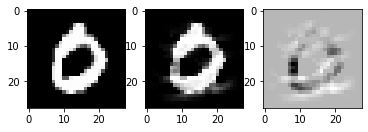

In [148]:
plot_adversarial(inputs, adv)

In [149]:
attack_evaluation(num_img, adv, 6)

0
Model 1 (9, 0.33343807)
Model 2 (9, 0.383684)
Model 3 (9, 0.7488585)
Model 4 (9, 0.5969018)
Model 5 (9, 0.69231343)
Model 6 (0, 0.8455416)
1
Model 1 (9, 0.34933773)
Model 2 (9, 0.31830975)
Model 3 (9, 0.9816245)
Model 4 (9, 0.8263403)
Model 5 (9, 0.6940686)
Model 6 (0, 0.8638559)
2
Model 1 (9, 0.32720837)
Model 2 (9, 0.50976866)
Model 3 (9, 0.89340585)
Model 4 (9, 0.9730369)
Model 5 (9, 0.8881185)
Model 6 (0, 0.7672857)
3
Model 1 (9, 0.3998543)
Model 2 (0, 0.8767498)
Model 3 (0, 0.63922215)
Model 4 (0, 0.50268155)
Model 5 (0, 0.9042114)
Model 6 (9, 0.40033194)
4
Model 1 (9, 0.2584989)
Model 2 (9, 0.31214717)
Model 3 (9, 0.560194)
Model 4 (3, 0.35708645)
Model 5 (9, 0.3474512)
Model 6 (0, 0.43926573)
5
Model 1 (9, 0.5148266)
Model 2 (9, 0.59217036)
Model 3 (9, 0.8144179)
Model 4 (9, 0.52203727)
Model 5 (9, 0.5256055)
Model 6 (0, 0.9974007)
6
Model 1 (9, 0.47602728)
Model 2 (0, 0.991351)
Model 3 (9, 0.4862623)
Model 4 (9, 0.5304077)
Model 5 (9, 0.7361707)
Model 6 (5, 0.9114814)
7
Model

In [150]:
size_of_attack(adv, inputs, num_img)

Mean 3.496390380859375
Standard Deviation 0.8817162


In [151]:
transferability(num_img, adv, 6)

0
Model 7 (0, 0.52651644)
1
Model 7 (0, 0.725461)
2
Model 7 (0, 0.94314116)
3
Model 7 (0, 0.9629834)
4
Model 7 (0, 0.556365)
5
Model 7 (0, 0.6050576)
6
Model 7 (9, 0.66621596)
7
Model 7 (0, 0.9597426)
8
Model 7 (0, 0.92976016)
9
Model 7 (9, 0.51964897)
10
Model 7 (2, 0.6716697)
11
Model 7 (2, 0.9065135)
12
Model 7 (0, 0.71439123)
13
Model 7 (9, 0.5453167)
14
Model 7 (9, 0.49409422)
15
Model 7 (2, 0.68878627)
16
Model 7 (9, 0.43115747)
17
Model 7 (0, 0.9702707)
18
Model 7 (0, 0.98878974)
19
Model 7 (9, 0.7929702)
20
Model 7 (0, 0.98091465)
21
Model 7 (0, 0.68637675)
22
Model 7 (0, 0.8373919)
23
Model 7 (9, 0.8271658)
24
Model 7 (0, 0.912637)


# Six Model Defense

In [152]:
from nn_robust_attacks.l2_attack_hex import CarliniL2

# Attack one model and protect four
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, attack=False).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.03226456, 0.017308345, 0.0)
1000 (0.028450966, 0.017275717, 0.0)
2000 (0.028451914, 0.01727651, 0.0)
[10000000000.0]
0 (0.28560746, 0.1730866, 0.0)
1000 (0.28126657, 0.17309824, 0.0)
2000 (0.28127006, 0.17308672, 0.0)
[10000000000.0]
0 (2.8185833, 1.7308705, 0.0)
1000 (2.5005412, 1.7073354, 0.0)
2000 (2.500747, 1.7073475, 0.0)
[10000000000.0]
0 (28.14829, 17.30871, 0.0)
1000 (9.671643, 0.91663253, 0.0)
2000 (9.64384, 0.7973968, 0.0)
3000 (9.595314, 0.78556645, 0.0)
4000 (9.60296, 0.68522274, 0.0)
[10000000000.0]
0 (281.44534, 173.08708, 0.0)
1000 (10.485346, 0.30592537, 0.0)
2000 (9.912431, 0.0, 0.0)
3000 (9.859532, 0.0, 0.0)
4000 (9.787269, 0.0, 0.0)
5000 (9.956562, 0.0, 0.0)
[9.632261]
0 (154.79681, 95.19791, 0.0)
1000 (10.200971, 0.0, 0.0)
2000 (10.032692, 0.08959788, 0.0)
3000 (9.954242, 0.0, 0.0)
4000 (9.660494, 0.0, 0.0)
5000 (9.871453, 0.0, 0.0)
[9.586153]
0 (91.472565, 56.253304, 0.0)
1000 (9.943201, 0.16048862, 0.0)
2000 (9.855092, 0.0, 

In [153]:
save_results(true_label, inputs, adv, targets, 'hex', 'def')

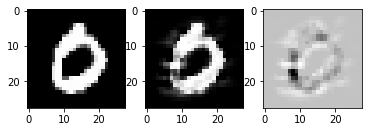

In [154]:
plot_adversarial(inputs, adv)

In [155]:
attack_evaluation(num_img, adv, 6)

0
Model 1 (9, 0.24314852)
Model 2 (0, 0.70074874)
Model 3 (0, 0.99976194)
Model 4 (0, 0.8399735)
Model 5 (0, 0.9945568)
Model 6 (0, 0.5911105)
1
Model 1 (9, 0.26283538)
Model 2 (2, 0.55844945)
Model 3 (2, 0.7574953)
Model 4 (2, 0.49248487)
Model 5 (0, 0.5901442)
Model 6 (2, 0.57593966)
2
Model 1 (9, 0.33797634)
Model 2 (0, 0.96501476)
Model 3 (0, 0.96102905)
Model 4 (0, 0.99723333)
Model 5 (0, 0.89552736)
Model 6 (0, 0.50879604)
3
Model 1 (9, 0.20971628)
Model 2 (0, 0.9165636)
Model 3 (0, 0.8944924)
Model 4 (0, 0.95262015)
Model 5 (0, 0.90648943)
Model 6 (8, 0.59208477)
4
Model 1 (9, 0.30640414)
Model 2 (0, 0.99791324)
Model 3 (0, 0.97505647)
Model 4 (0, 0.8618857)
Model 5 (0, 0.9958715)
Model 6 (0, 0.99028945)
5
Model 1 (9, 0.23773858)
Model 2 (0, 0.45002756)
Model 3 (2, 0.985029)
Model 4 (2, 0.97730815)
Model 5 (0, 0.5178424)
Model 6 (0, 0.9421013)
6
Model 1 (9, 0.31343988)
Model 2 (0, 0.9999657)
Model 3 (0, 0.9706461)
Model 4 (0, 0.99113876)
Model 5 (0, 0.67859817)
Model 6 (0, 0.982

In [156]:
size_of_attack(adv, inputs, num_img)

Mean 4.219928588867187
Standard Deviation 0.93755764


In [158]:
transferability(num_img, adv, 6)

0
Model 7 (0, 0.85122114)
1
Model 7 (0, 0.88800114)
2
Model 7 (0, 0.99850893)
3
Model 7 (0, 0.86483604)
4
Model 7 (0, 0.9801242)
5
Model 7 (0, 0.75159496)
6
Model 7 (2, 0.6839588)
7
Model 7 (0, 0.99905646)
8
Model 7 (0, 0.6447804)
9
Model 7 (0, 0.82433134)
10
Model 7 (0, 0.78054476)
11
Model 7 (0, 0.99876094)
12
Model 7 (2, 0.8312489)
13
Model 7 (0, 0.98971736)
14
Model 7 (0, 0.97308034)
15
Model 7 (2, 0.99908197)
16
Model 7 (0, 0.72011316)
17
Model 7 (0, 0.9989492)
18
Model 7 (0, 0.98633194)
19
Model 7 (0, 0.9813427)
20
Model 7 (0, 0.9991242)
21
Model 7 (0, 0.9296159)
22
Model 7 (0, 0.9990694)
23
Model 7 (0, 0.86768025)
24
Model 7 (0, 0.98003924)


# Eight Model Attack

In [ ]:
from nn_robust_attacks.l2_attack_octo import CarliniL2

# Attack one model and protect four
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, model7, model8, attack=True).attack(inputs, targets)

In [ ]:
save_results(true_label, inputs, adv, targets, 'octo', 'att')

In [ ]:
plot_adversarial(inputs, adv)

In [ ]:
attack_evaluation(num_img, adv, 8)

In [ ]:
size_of_attack(adv, inputs, num_img)

In [ ]:
transferability(num_img, adv, 8)

# Eight Model Defense

In [ ]:
from nn_robust_attacks.l2_attack_octo import CarliniL2

# Attack one model and protect four
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, model7, model8, attack=True).attack(inputs, targets)

In [ ]:
save_results(true_label, inputs, adv, targets, 'octo', 'def')

In [ ]:
plot_adversarial(inputs, adv)

In [ ]:
attack_evaluation(num_img, adv, 8)

In [ ]:
size_of_attack(adv, inputs, num_img)

In [ ]:
transferability(num_img, adv, 8)

# Ten Model Attack

In [82]:
from nn_robust_attacks.l2_attack_dec import CarliniL2

# Attack nine models and protect one
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, attack=True).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.15297037, 0.017109286, 0.01999283)
1000 (0.14967367, 0.017128838, 0.01999774)
2000 (0.14967468, 0.017128846, 0.019997895)
[10000000000.0]
0 (1.492293, 0.1710919, 0.19992845)
1000 (1.4381202, 0.15912834, 0.18516286)
2000 (1.4381037, 0.15911412, 0.18515608)
[10000000000.0]
0 (14.885405, 1.7109216, 1.9992876)
1000 (6.447069, 0.2926798, 0.062991254)
2000 (6.4420204, 0.2869783, 0.05693389)
3000 (6.452221, 0.29407695, 0.07411014)
[10000000000.0]
0 (148.8165, 17.109219, 19.992876)
1000 (8.690454, 0.0, 0.0)
2000 (8.292772, 0.04280386, 0.0)
3000 (8.298502, 0.015114166, 0.0)
4000 (8.275601, 0.034762003, 0.0)
[7.969302]
0 (81.85096, 9.41007, 10.996084)
1000 (8.084564, 0.122775175, 0.0)
2000 (8.046699, 0.14387035, 0.0)
3000 (8.043492, 0.11193084, 0.0)
[7.0807323]
0 (48.368176, 5.5604963, 6.497685)
1000 (7.419193, 0.40283784, 0.0)
2000 (7.424384, 0.40071294, 0.0013405399)
[7.0807323]
0 (65.10956, 7.485284, 8.746884)
1000 (7.7601933, 0.36901677, 0.0)
2000 (7.7

In [83]:
save_results(true_label, inputs, adv, targets, 'dec', 'att')

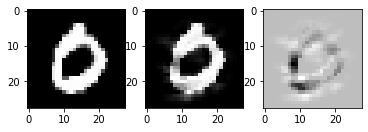

In [84]:
plot_adversarial(inputs, adv)

In [85]:
attack_evaluation(num_img, adv, 10)

0
Model 1 (9, 0.32850885)
Model 2 (9, 0.38743857)
Model 3 (9, 0.727286)
Model 4 (9, 0.76470953)
Model 5 (9, 0.85255915)
Model 6 (9, 0.58763176)
Model 7 (9, 0.5720061)
Model 8 (9, 0.57679594)
Model 9 (9, 0.42792782)
Model 10 (0, 0.8882126)
1
Model 1 (9, 0.39150557)
Model 2 (9, 0.44054893)
Model 3 (9, 0.98875415)
Model 4 (9, 0.78506964)
Model 5 (9, 0.53169805)
Model 6 (9, 0.42793092)
Model 7 (9, 0.5865764)
Model 8 (9, 0.429504)
Model 9 (9, 0.34754583)
Model 10 (2, 0.92153126)
2
Model 1 (9, 0.45134708)
Model 2 (9, 0.6445482)
Model 3 (9, 0.9756807)
Model 4 (9, 0.9947041)
Model 5 (9, 0.9788366)
Model 6 (9, 0.49100286)
Model 7 (9, 0.5504368)
Model 8 (9, 0.5558864)
Model 9 (9, 0.92655927)
Model 10 (0, 0.54585844)
3
Model 1 (9, 0.40293851)
Model 2 (0, 0.9441286)
Model 3 (0, 0.5335878)
Model 4 (0, 0.5686894)
Model 5 (0, 0.8610523)
Model 6 (9, 0.46221253)
Model 7 (0, 0.93476266)
Model 8 (9, 0.5376541)
Model 9 (0, 0.57578826)
Model 10 (0, 0.95560056)
4
Model 1 (9, 0.4231135)
Model 2 (9, 0.4615595

In [86]:
size_of_attack(adv, inputs, num_img)

Mean 2.107277069091797
Standard Deviation 0.8726628


In [87]:
transferability(num_img, adv, 10)

0
Model 6 (9, 0.58763176)
1
Model 6 (9, 0.42793092)
2
Model 6 (9, 0.49100286)
3
Model 6 (9, 0.46221253)
4
Model 6 (0, 0.57272434)
5
Model 6 (0, 0.4197886)
6
Model 6 (9, 0.5306613)
7
Model 6 (9, 0.4931948)
8
Model 6 (9, 0.33789986)
9
Model 6 (9, 0.977238)
10
Model 6 (9, 0.388993)
11
Model 6 (9, 0.4649477)
12
Model 6 (9, 0.44796246)
13
Model 6 (9, 0.5116756)
14
Model 6 (9, 0.3155891)
15
Model 6 (0, 0.9526371)
16
Model 6 (9, 0.39926735)
17
Model 6 (9, 0.6259888)
18
Model 6 (9, 0.50355816)
19
Model 6 (9, 0.6786035)
20
Model 6 (0, 0.6214927)
21
Model 6 (9, 0.35583717)
22
Model 6 (9, 0.5239297)
23
Model 6 (9, 0.41931692)
24
Model 6 (9, 0.38486522)


# Ten Model Defense

In [88]:
from nn_robust_attacks.l2_attack_dec import CarliniL2

# Attack one model and protect nine
adv = CarliniL2(sess, model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, attack=False).attack(inputs, targets)

go up to 25
tick 0
[10000000000.0]
0 (0.034054402, 0.017330537, 0.0)
1000 (0.030389784, 0.017287897, 0.0)
2000 (0.030391445, 0.017287174, 0.0)
[10000000000.0]
0 (0.30346918, 0.1733086, 0.0)
1000 (0.29680532, 0.17421325, 0.0)
2000 (0.29679367, 0.17422527, 0.0)
[10000000000.0]
0 (2.9972167, 1.7330885, 0.0)
1000 (2.5396063, 1.7269684, 0.0)
2000 (2.5394819, 1.7272791, 0.0)
[10000000000.0]
0 (29.934643, 17.330889, 0.0)
1000 (9.604375, 0.57613146, 0.0)
2000 (9.518727, 0.47017464, 0.0)
3000 (9.485225, 0.29138145, 0.0)
4000 (9.487488, 0.3583468, 0.0)
5000 (9.523824, 0.3723062, 0.0)
[10000000000.0]
0 (299.30893, 173.30893, 0.0)
1000 (10.381551, 0.0, 0.0)
2000 (9.792516, 0.0, 0.0)
3000 (9.703663, 0.0, 0.0)
[9.570769]
0 (164.62177, 95.319885, 0.0)
1000 (10.068869, 0.0, 0.0)
2000 (9.640003, 0.0, 0.0)
3000 (9.716995, 0.0, 0.0)
[9.469692]
0 (97.278206, 56.325394, 0.0)
1000 (9.71172, 0.0, 0.0)
2000 (9.712088, 0.079738095, 0.0)
3000 (9.596213, 0.0, 0.0)
4000 (9.566875, 0.0, 0.0)
[9.469692]
0 (63.60642

In [94]:
save_results(true_label, inputs, adv, targets, 'dec', 'def')

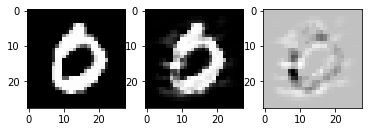

In [95]:
plot_adversarial(inputs, adv)

In [96]:
attack_evaluation(num_img, adv, 10)

0
Model 1 (9, 0.24572842)
Model 2 (0, 0.7177144)
Model 3 (0, 0.99974823)
Model 4 (0, 0.832279)
Model 5 (0, 0.99477875)
Model 6 (0, 0.6108444)
Model 7 (0, 0.8646706)
Model 8 (0, 0.98687774)
Model 9 (0, 0.51179844)
Model 10 (0, 0.8941971)
1
Model 1 (9, 0.22548378)
Model 2 (2, 0.5639797)
Model 3 (2, 0.62757504)
Model 4 (2, 0.661555)
Model 5 (2, 0.5753157)
Model 6 (0, 0.80917287)
Model 7 (0, 0.86004335)
Model 8 (0, 0.96761423)
Model 9 (2, 0.54926974)
Model 10 (0, 0.99285334)
2
Model 1 (9, 0.31845784)
Model 2 (0, 0.9351999)
Model 3 (0, 0.8552592)
Model 4 (0, 0.98427165)
Model 5 (0, 0.97491723)
Model 6 (0, 0.6899003)
Model 7 (0, 0.9989874)
Model 8 (0, 0.9954036)
Model 9 (0, 0.56330156)
Model 10 (0, 0.99828863)
3
Model 1 (9, 0.20695707)
Model 2 (0, 0.945301)
Model 3 (0, 0.8947602)
Model 4 (0, 0.96358114)
Model 5 (0, 0.9637976)
Model 6 (0, 0.5544579)
Model 7 (0, 0.89127827)
Model 8 (0, 0.545872)
Model 9 (0, 0.95606655)
Model 10 (0, 0.98405886)
4
Model 1 (9, 0.30385187)
Model 2 (0, 0.9977158)
M

In [97]:
size_of_attack(adv, inputs, num_img)

Mean 4.517554016113281
Standard Deviation 0.9746401


In [98]:
transferability(num_img, adv, 10)

0
Model 6 (0, 0.6108444)
1
Model 6 (0, 0.80917287)
2
Model 6 (0, 0.6899003)
3
Model 6 (0, 0.5544579)
4
Model 6 (0, 0.9903516)
5
Model 6 (0, 0.99014515)
6
Model 6 (0, 0.9696961)
7
Model 6 (0, 0.99992555)
8
Model 6 (0, 0.74595225)
9
Model 6 (0, 0.9691318)
10
Model 6 (0, 0.55100596)
11
Model 6 (0, 0.96344036)
12
Model 6 (0, 0.6851095)
13
Model 6 (2, 0.887444)
14
Model 6 (0, 0.9712665)
15
Model 6 (0, 0.84818)
16
Model 6 (0, 0.6831322)
17
Model 6 (7, 0.89164454)
18
Model 6 (0, 0.99981254)
19
Model 6 (0, 0.791389)
20
Model 6 (0, 0.9935571)
21
Model 6 (0, 0.8278289)
22
Model 6 (0, 0.9733715)
23
Model 6 (5, 0.80073154)
24
Model 6 (0, 0.99789757)
